# Section 3.2

## Exercise 3.4

In [32]:
#INPUTS
alpha <- 3
beta <- 2
lambda <- 10
a <- c(0,1,4,6)
m <- 1e5

#Define sampler from Pareto using inverse method
draw_Pareto<-function(m,alpha,beta){
    U <- runif(m)
    Z <- beta*(U^(-1/alpha)-1)
    return(Z)
}

#Define function calculating reinsurance recoverables  for a contract a non-proportional reinsurance per event with threshold a
calc_reinsurance<-function(Z,a){
    Zre <- pmax(Z-a,0)
    return(Zre)
}

#run functions
Z<-draw_Pareto(m,alpha,beta)
Zre1 <- calc_reinsurance(Z,a[1])
Zre2 <- calc_reinsurance(Z,a[2])
Zre3 <- calc_reinsurance(Z,a[3])
Zre4 <- calc_reinsurance(Z,a[4])

#Calculate premiums
c(lambda*mean(Zre1),lambda*mean(Zre2),lambda*mean(Zre3),lambda*mean(Zre4))

#Calculate volatility of retained claims

c(sd(Z-Zre1),sd(Z-Zre2),sd(Z-Zre3),sd(Z-Zre4))


[1] 10.0860110  4.5212857  1.1527921  0.6586293

[1] 0.0000000 0.3685052 0.9992217 1.1781554

# Exercise 3.5

In [44]:
#INPUTS
alpha <- 3
beta <- 2
lambda <- 10
a_1<-1
a_2<-2
b <- c(2,4,6)
gamma <- 0.5
m <- 1e5


#Define sampler from Pareto using inverse method
draw_Pareto<-function(m,alpha,beta){
    U <- runif(m)
    Z <- beta*(U^(-1/alpha)-1)
    return(Z)
}

#Define function calculating reinsurance recoverables  for a contract a non-proportional reinsurance per event with threshold a
calc_reinsurance<-function(Z,a,gamma){
    Zre <- gamma*pmax(Z-a,0)
    return(Zre)
}

#run functions for a_1
Z<-draw_Pareto(m,alpha,beta)
Zre1 <- calc_reinsurance(Z,a_1,1)

Zre21 <- calc_reinsurance(Zre1,b[1],gamma)
Zre22 <- calc_reinsurance(Zre1,b[2],gamma)
Zre23 <- calc_reinsurance(Zre1,b[3],gamma)
c(lambda*mean(Zre21),lambda*mean(Zre22),lambda*mean(Zre23))

#run functions for a_2
Zre2 <- calc_reinsurance(Z,a_2,1)

Zre21 <- calc_reinsurance(Zre2,b[1],gamma)
Zre22 <- calc_reinsurance(Zre2,b[2],gamma)
Zre23 <- calc_reinsurance(Zre2,b[3],gamma)
c(lambda*mean(Zre21),lambda*mean(Zre22),lambda*mean(Zre23))

[1] 0.8013385 0.4127437 0.2513299

[1] 0.5588674 0.3175191 0.2023688

# Secrtion 3.3
## Exercise 3.6

In [45]:
# Inputs
lambda <- 10
xi <- 0
sigma <- 1
m <- 10000

#program
generate_compound_poiss<-function(lambda,xi,sigma,m){
    N <- rpois(m,lambda)
    Xcal <- rep(0,m)
    for(i in 1:m)
      {
            Z <- rlnorm(N[i],xi,sigma)
            Xcal[i] <- sum(Z)
      }
    return(Xcal)
}

Xcal<-generate_compound_poiss(lambda,xi,sigma,m)

#output
c(lambda*exp(xi+0.5*sigma^2),sqrt(lambda)*exp(xi+sigma^2)) # theoretical
c(mean(Xcal),sd(Xcal)) # simulated

[1] 16.487213  8.595962

[1] 16.368052  8.431589

## Exercise 3.7

[1] 16.36805

[1] 32.00956 42.82330

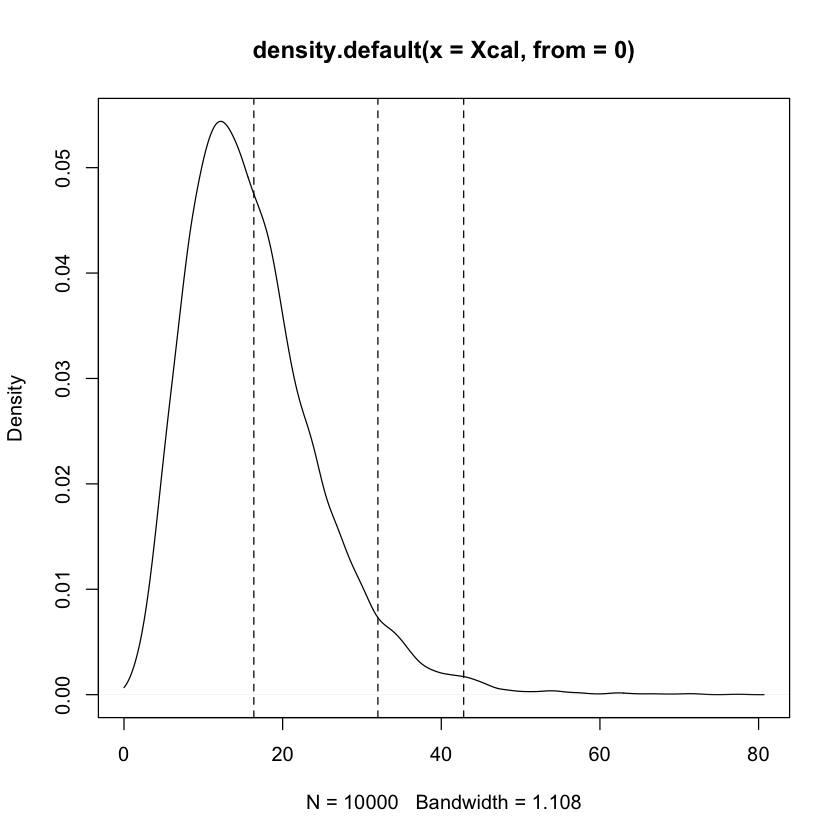

In [46]:
#plot denisty
plot(density(Xcal,from=0))

#calculate mean and percentiles
mean(Xcal)
sort(Xcal)[m*c(0.95,0.99)]

#add mean and percentiles
abline(v=c(mean(Xcal),sort(Xcal)[m*c(0.95,0.99)]),lty=2)


## Exercise 3.8

[1] 164.7439

[1] 211.3978 235.3151

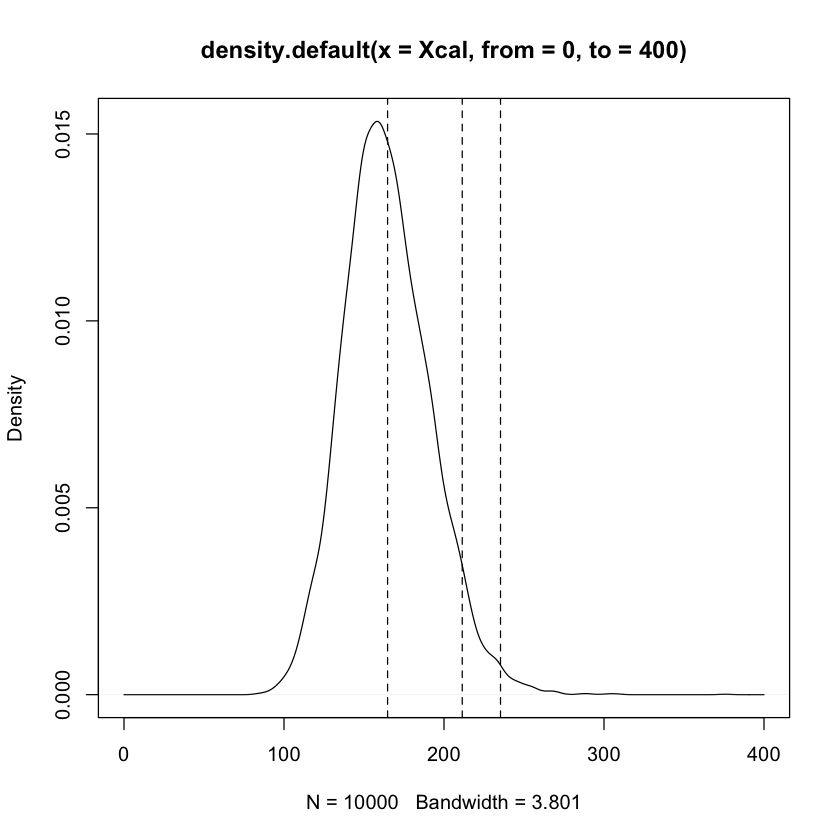

In [47]:
# Input
lambda <- 100
xi <- 0
sigma <- 1
m <- 10000

#run function
Xcal<-generate_compound_poiss(lambda,xi,sigma,m)

#plot
plot(density(Xcal,from=0, to=400))

mean(Xcal)
sort(Xcal)[m*c(0.95,0.99)]

abline(v=c(mean(Xcal),sort(Xcal)[m*c(0.95,0.99)]),lty=2)

## Exercise 3.9

[1] "Theoretical mean and sd"


[1] 10.000000  3.464102

[1] "Simualted mean and sd"


[1] 9.989676 3.447552

[1] "percentiles"


[1] 16.04046 18.88598

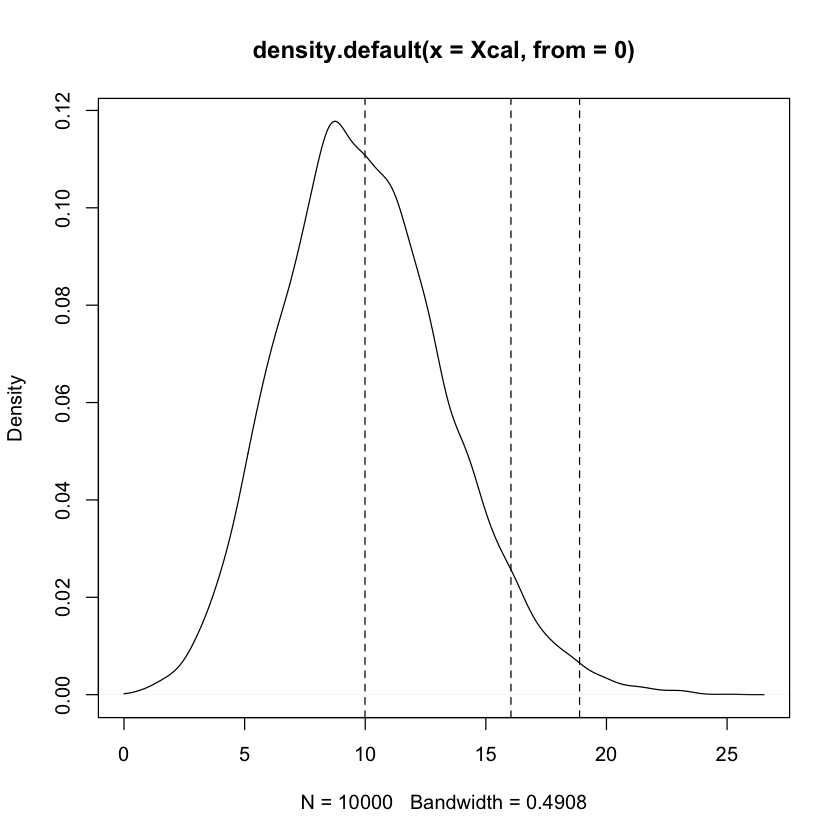

In [48]:
#Input
lambda <- 10
xi <- 1
alpha <- 5
m <- 10000

#program
generate_compound_poiss_gamma<-function(lambda,xi,alpha,m){
    N <- rpois(m,lambda)
    Xcal <- rep(0,m)
    for(i in 1:m)
      {
        Z <- xi*rgamma(N[i],alpha,alpha)
        Xcal[i] <- sum(Z)
      }
    return(Xcal)
}

#run program
Xcal<-generate_compound_poiss_gamma(lambda,xi,alpha,m)

#Compare theretical mean and sd. dev
print("Theoretical mean and sd")
c(lambda*xi,sqrt(lambda)*xi*sqrt(1/alpha+1))
print("Simualted mean and sd")
c(mean(Xcal),sd(Xcal))

#plot
plot(density(Xcal,from=0))


print("percentiles")
sort(Xcal)[m*c(0.95,0.99)]
#sort(Xcal)[m*c(0.95,0.99)]/mean(Xcal)

abline(v=c(mean(Xcal),sort(Xcal)[m*c(0.95,0.99)]),lty=2)

## Exercise 3.10

In [38]:
#Input
xi <- 0
sigma <- 1
a <- 0
b <- 1
m <- 1e5

#Generate losses and apply deduct and SI

Z <- rlnorm(m,xi,sigma)
H <- pmin(pmax(Z-a,0),b)

#output
c(mean(Z),sd(Z))
c(mean(H),sd(H))

[1] 1.651192 2.176742

[1] 0.7615294 0.2964725

## Exercise 3.11

In [39]:
#inputs
lambda <- 10
xi <- 1
alpha <- 5
a <- c(0.5,1,2,100)
b <- 100
m <- 10000

#generate compound  and net down
generate_and_net<-function(lambda,xi,alpha,a,b,m){
    N <- rpois(m,lambda)
    Xcal<- rep(0,m)
    for(i in 1:m)
      {
        Z <- xi*rgamma(N[i],alpha,alpha)
        H <- pmin(pmax(Z-a,0),b)
        Xcal[i] <- sum(Z-H)
      }
    return(Xcal)
}

#run the function
Xcal1<-generate_and_net(lambda,xi,alpha,a[1],b,m)
Xcal2<-generate_and_net(lambda,xi,alpha,a[2],b,m)
Xcal3<-generate_and_net(lambda,xi,alpha,a[3],b,m)
Xcal4<-generate_and_net(lambda,xi,alpha,a[4],b,m)

#calculate percentiles
sort(Xcal1)[m*c(0.95,0.99)]
sort(Xcal2)[m*c(0.95,0.99)]
sort(Xcal3)[m*c(0.95,0.99)]
sort(Xcal4)[m*c(0.95,0.99)]

[1] 7.546006 8.908004

[1] 12.83511 15.09816

[1] 15.90354 18.54280

[1] 16.09716 19.06805

## Exercise 3.12

In [49]:
lambda <- 10
xi <- 1
alpha <- 5
a <- c(0.5,1,2,100)
b <- 100
m <- 10000

#generate compound  and net down
generate_and_net_re<-function(lambda,xi,alpha,a,b,m){
    N <- rpois(m,lambda)
    Xcal<- rep(0,m)
    for(i in 1:m)
      {
        Z <- xi*rgamma(N[i],alpha,alpha)
        H <- pmin(pmax(Z-a,0),b)
        Xcal[i] <- sum(H)
      }
    return(Xcal)
}

#run the function
Xcal1<-generate_and_net_re(lambda,xi,alpha,a[1],b,m)
Xcal2<-generate_and_net_re(lambda,xi,alpha,a[2],b,m)
Xcal3<-generate_and_net_re(lambda,xi,alpha,a[3],b,m)
Xcal4<-generate_and_net_re(lambda,xi,alpha,a[4],b,m)

#calc percentiles
print("percentiles")
sort(Xcal1)[m*c(0.95,0.99)]
sort(Xcal2)[m*c(0.95,0.99)]
sort(Xcal3)[m*c(0.95,0.99)]
sort(Xcal4)[m*c(0.95,0.99)]

#calc pure premium
print("premium")
mean(Xcal1)
mean(Xcal2)
mean(Xcal3)
mean(Xcal4)

[1] "percentiles"


[1]  8.871864 10.700006

[1] 3.836450 4.952938

[1] 0.5554416 1.0360290

[1] 0 0

[1] "premium"


[1] 5.08832

[1] 1.77018

[1] 0.08676413

[1] 0

## Exercise 3.13

In [41]:
#Inputs
lambda <- 10
xi <- 0
sigma <- 1
a <- 15
b <- 25
m <- 1e5

#generate compound poiss
N <- rpois(m,lambda)
Xcal <- rep(0,m)
for(i in 1:m)
  {
    Z <- rlnorm(N[i],xi,sigma)
    Xcal[i] <- sum(Z)
  }
Xcalre <- pmin(pmax(Xcal-a,0),b)
Xcalce <- Xcal-Xcalre
 
#output
mean(Xcalre)
sort(Xcalce)[m*c(0.95,0.99)]
sort(Xcalre)[m*c(0.95,0.99)]
sort(Xcal)[m*c(0.95,0.99)]

[1] 3.822562

[1] 15.00000 18.92599

[1] 17.34737 25.00000

[1] 32.34737 43.92599

In [42]:
## Exercise 3.14

In [43]:
#Inputs
lambda <- 10
xi <- 0
sigma <- 1
a <- 25
b <- 35
m <- 1e5

#generate compound poiss
N <- rpois(m,lambda)
Xcal <- rep(0,m)
for(i in 1:m)
  {
    Z <- rlnorm(N[i],xi,sigma)
    Xcal[i] <- sum(Z)
  }
Xcalre <- pmin(pmax(Xcal-a,0),b)
Xcalce <- Xcal-Xcalre
 
#output
mean(Xcalre)
sort(Xcalce)[m*c(0.95,0.99)]
sort(Xcalre)[m*c(0.95,0.99)]
sort(Xcal)[m*c(0.95,0.99)]

[1] 1.006328

[1] 25 25

[1]  7.353403 18.829315

[1] 32.35340 43.82931